In [1]:
import os
if os.getcwd().endswith("Misc Fig and Table Generation Scripts"):
    os.chdir('../')

from cdrift.utils import helpers

import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime as dt

In [2]:

# Get all csv's (and split where necessary) #

b = helpers.readCSV_Lists("testAll/Bose/evaluation_results.csv")
b["Algorithm/Options"] = b["Algorithm/Options"].apply(
    lambda x: 
    "Bose J" if x == "Bose Average J" 
    else "Bose WC" if x == "Bose Average WC" 
    else "Bose ???"
)

b_j = b[b["Algorithm/Options"] == "Bose J"]
b_wc = b[b["Algorithm/Options"] == "Bose WC"]

m = pd.read_csv("testAll/Martjushev/evaluation_results.csv", converters={"Duration":lambda x: dt.strptime(x, '%H:%M:%S')})
m["Algorithm/Options"] = m["Algorithm/Options"].apply(
    lambda x: 
    "Martjushev J" if x == "Martjushev Recursive Bisection; Average J; p=0.65"
     else "Martjushev WC" if x == "Martjushev Recursive Bisection; Average WC; p=0.65" 
     else "Martjushev ???"
)
m_j = m[m["Algorithm/Options"] == "Martjushev J"]
m_wc = m[m["Algorithm/Options"] == "Martjushev WC"]

em = helpers.readCSV_Lists("testAll/Earthmover/evaluation_results.csv")

prodrift = helpers.readCSV_Lists("testAll/Maaradji/evaluation_results.csv")
prodrift["Algorithm/Options"] = prodrift["Algorithm/Options"].apply(lambda x: "ProDrift")

pgraphs = helpers.readCSV_Lists("testAll/ProcessGraph/evaluation_results.csv")
pgraphs["Algorithm/Options"] = pgraphs["Algorithm/Options"].apply(lambda x: "Process Graphs")

zheng = helpers.readCSV_Lists("testAll/Zheng/evaluation_results.csv")
zheng["Algorithm/Options"] = zheng["Algorithm/Options"].apply(lambda x: "Zheng")

dataframes = [b_j, b_wc, m_j, m_wc, prodrift, em, pgraphs, zheng]

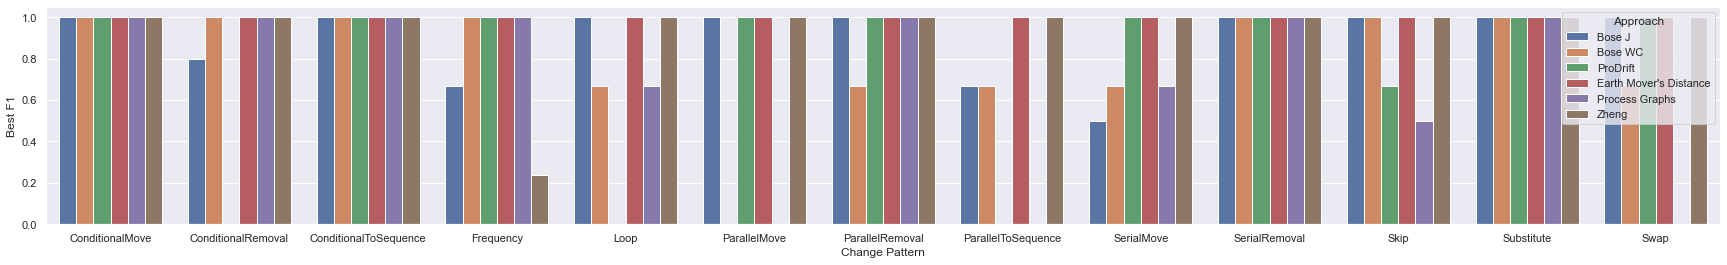

In [6]:
import seaborn as sns
HANDLE_NAN_AS = 0 # NaN F1s are handled as 0

data = pd.DataFrame(columns=['Change Pattern', 'Approach', 'Best F1'])

for df in dataframes:
    for logname, group in df.groupby("Log"):
        actualName = logname.split("_")[-1]
        if actualName == "log":
            actualName = "Noiseless"
        for approach, g2 in group.groupby("Algorithm/Options"):
            bestf1 = g2["F1-Score"].fillna(HANDLE_NAN_AS,inplace=False).max()
            data = data.append({
                'Change Pattern': actualName,
                'Approach': approach,
                'Best F1': bestf1
            }, ignore_index=True)

sns.set(rc={"figure.figsize":(30, 4)})
sns.barplot(x="Change Pattern", y="Best F1", hue="Approach", data=data)
plt.show()